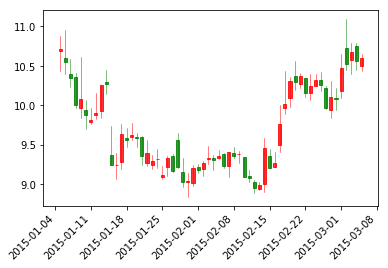

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.ticker import Formatter
from mpl_finance import candlestick_ochl


def plot_k_line(stockCode, sliceSize):
    slice_size = slice(sliceSize)
    #1.数据预处理
    #读取数据
    data = pd.read_csv(("stocks/" + stockCode + ".csv"))

    #将时间数据转换为pandas的时间格式
    data["date"] = pd.to_datetime(data["date"], infer_datetime_format=True, yearfirst=True)

    #将时间数据转换为matplotlib的时间格式
    data['date'] = data['date'].apply(lambda d: mdates.date2num(d.to_pydatetime()))
    data['date'] = np.float64(range(int(data['date'][0].item()), int(data['date'][0].item()) + len(data)))
    #将数据框转换为元组
    tuples = [tuple(x) for x in data[['date', 'open', 'close', 'high', 'low']].values][slice_size]

    #2.图像设置
    #获得fig和ax对象
    fig, ax = plt.subplots()
    #调节横坐标距离底部的长度
    fig.subplots_adjust(bottom=0.2)
    ax.xaxis_date()
    ax.autoscale_view()
    #3.绘图
    #烛台图绘制

    candlestick_ochl(ax, tuples, width=0.6, colorup='r', colordown="g", alpha=0.8)
    #调整图像设置横坐标标签的显示样式，获得当前坐标轴plt.gca、获得x轴刻度标签get_xticklabels、转换角度rotation、旋转角度hori...ent
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.show()

    
plot_k_line('000001', 60)

In [6]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt


df = pd.read_csv('stocks/000001.csv', encoding='utf-8', index_col='date')
df.index = pd.to_datetime(df.index)  # 将字符串索引转换成时间索引
ts = df['close']  # 生成pd.Series对象
# 查看数据格式
ts.head()
ts.head().index 

DatetimeIndex(['2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09'],
              dtype='datetime64[ns]', name='date', freq=None)

In [9]:
ts['2016-4':'2017-5']

date
2016-04-01    8.623
2016-04-05    8.655
2016-04-06    8.672
2016-04-07    8.566
2016-04-08    8.550
2016-04-11    8.672
2016-04-12    8.631
2016-04-13    8.744
2016-04-14    8.769
2016-04-15    8.801
2016-04-18    8.680
2016-04-19    8.712
2016-04-20    8.510
2016-04-21    8.502
2016-04-22    8.534
2016-04-25    8.494
2016-04-26    8.566
2016-04-27    8.550
2016-04-28    8.623
2016-04-29    8.550
2016-05-03    8.639
2016-05-04    8.672
2016-05-05    8.672
2016-05-06    8.510
2016-05-09    8.372
2016-05-10    8.316
2016-05-11    8.388
2016-05-12    8.397
2016-05-13    8.372
2016-05-16    8.380
              ...  
2017-04-17    8.967
2017-04-18    8.918
2017-04-19    8.780
2017-04-20    8.790
2017-04-21    8.839
2017-04-24    8.800
2017-04-25    8.869
2017-04-26    8.859
2017-04-27    8.839
2017-04-28    8.859
2017-05-02    8.810
2017-05-03    8.780
2017-05-04    8.612
2017-05-05    8.504
2017-05-08    8.445
2017-05-09    8.514
2017-05-10    8.543
2017-05-11    8.573
2017-05-12    8

In [37]:
ts.rolling(window=30,center=False).std()

date
2015-01-05         NaN
2015-01-06         NaN
2015-01-07         NaN
2015-01-08         NaN
2015-01-09         NaN
2015-01-12         NaN
2015-01-13         NaN
2015-01-14         NaN
2015-01-15         NaN
2015-01-16         NaN
2015-01-19         NaN
2015-01-20         NaN
2015-01-21         NaN
2015-01-22         NaN
2015-01-23         NaN
2015-01-26         NaN
2015-01-27         NaN
2015-01-28         NaN
2015-01-29         NaN
2015-01-30         NaN
2015-02-02         NaN
2015-02-03         NaN
2015-02-04         NaN
2015-02-05         NaN
2015-02-06         NaN
2015-02-09         NaN
2015-02-10         NaN
2015-02-11         NaN
2015-02-12         NaN
2015-02-13    0.474507
                ...   
2018-03-15    0.903542
2018-03-16    0.879572
2018-03-19    0.859180
2018-03-20    0.838250
2018-03-21    0.784539
2018-03-22    0.726881
2018-03-23    0.664018
2018-03-26    0.535304
2018-03-27    0.435367
2018-03-28    0.438651
2018-03-29    0.446985
2018-03-30    0.478415
2018-0

In [34]:
window = ts[-30:]

date
2018-03-15    11.71
2018-03-16    11.64
2018-03-19    11.83
2018-03-20    11.82
2018-03-21    11.90
2018-03-22    11.66
2018-03-23    11.34
2018-03-26    10.93
2018-03-27    10.94
2018-03-28    10.89
2018-03-29    11.05
2018-03-30    10.90
2018-04-02    10.71
2018-04-03    10.56
2018-04-04    10.87
2018-04-09    11.02
2018-04-10    11.42
2018-04-11    11.83
2018-04-12    11.52
2018-04-13    11.57
2018-04-16    11.10
2018-04-17    11.21
2018-04-18    11.50
2018-04-19    11.47
2018-04-20    11.35
2018-04-23    11.57
2018-04-24    11.86
2018-04-25    11.68
2018-04-26    11.42
2018-04-27    10.85
Name: close, dtype: float64

In [38]:
ts = ts.values

In [39]:
ts


array([10.708, 10.548, 10.347,  9.999, 10.08 ,  9.872,  9.812,  9.899,
       10.26 , 10.273,  9.244,  9.244,  9.638,  9.558,  9.625,  9.585,
        9.351,  9.398,  9.291,  9.311,  9.11 ,  9.324,  9.164,  9.217,
        9.03 ,  9.037,  9.204,  9.177,  9.264,  9.324,  9.304,  9.351,
        9.224,  9.405,  9.351,  9.378,  9.09 ,  9.07 ,  8.943,  8.983,
        9.458,  9.204,  9.264,  9.759, 10.019, 10.3  , 10.294, 10.367,
       10.153, 10.24 , 10.314, 10.26 ,  9.966, 10.1  , 10.08 , 10.467,
       10.527, 10.668, 10.561, 10.594, 11.236, 11.978, 12.031, 13.234,
       13.38 , 13.185, 13.468, 13.752, 13.695, 13.185, 13.396, 13.711,
       13.477, 13.056, 13.282, 13.509, 13.468, 13.509, 13.363, 12.829,
       12.716, 12.676, 12.821, 12.967, 12.91 , 12.846, 12.854, 12.498,
       12.279, 12.611, 12.732, 12.773, 13.161, 13.428, 13.444, 13.331,
       12.538, 12.393, 12.862, 12.757, 12.805, 13.242, 13.185, 13.986,
       13.735, 13.493, 13.331, 13.355, 12.878, 12.651, 12.724, 12.441,
      

In [40]:
type(ts)

numpy.ndarray

In [44]:
df['close'].values[-30:]

array([11.71, 11.64, 11.83, 11.82, 11.9 , 11.66, 11.34, 10.93, 10.94,
       10.89, 11.05, 10.9 , 10.71, 10.56, 10.87, 11.02, 11.42, 11.83,
       11.52, 11.57, 11.1 , 11.21, 11.5 , 11.47, 11.35, 11.57, 11.86,
       11.68, 11.42, 10.85])

In [53]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt


df = pd.read_csv('stocks/000001.csv', encoding='utf-8', index_col='date')
df.index = pd.to_datetime(df.index)  # 将字符串索引转换成时间索引
array = df['close'].values
window = array[-30:]


norms = []
for index in range(0, len(array) - 60):
    norm = np.linalg.norm(array[index:index + 30] - window)
    norms.append(norm)

In [104]:
import tushare as ts
from matplotlib.dates import date2num

data_list = []
index_of_min = norms.index(min(norms))
start_date = str(df.index[index_of_min])
end_date = str(df.index[index_of_min + 60])
t = int(date2num(datetime.now()))
hist_data = ts.get_hist_data('000001', start=start_date, end=end_date)

for dates, row in hist_data.iterrows():
    date_time = datetime.strptime(dates,'%Y-%m-%d')
    t -= 1
    open,high,close,low = row[:4] # unpacking
    datas = (t,open,high,low,close)
    data_list.append(datas)

In [106]:
start_date

'2017-09-08 00:00:00'